# Calibration of Qubit 2 (14N)

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

import importlib
import libxq1i
importlib.reload(libxq1i)

try: 
   pulsed_master_logic
except NameError:
   manager.startModule('logic', 'pulsed_master_logic')

xq1i = libxq1i.xq1i(pulsed_master_logic, pulsed_measurement_logic, sequence_generator_logic)

In [ ]:
#Measure Qubit-1 transition frequency#
res_freq = 1.448466e9
xq1i.generate_params['microwave_frequency'] = res_freq
xq1i.pulsedODMR_params['freq_start'] = res_freq - 5.0e6
xq1i.pulsedODMR_params['freq_step'] = 0.1e6
xq1i.pulsedODMR_sweeps = 100000 
xq1i.do_pulsedODMR()
time.sleep(2)
result_dict = xq1i.pulsed_measurement_logic.do_fit('Lorentzian Dip')
xq1i.res_freq = result_dict.params['center'].value
time.sleep(2)

#Measure Qubit-1 gate parameters#
xq1i.rabi_sweeps = 100000
xq1i.do_rabi(isSlow=False)    # perform fast Rabi
result_dict = xq1i.pulsed_measurement_logic.do_fit('Sine')
rabiperiod = 1/(result_dict.params['frequency'].value)   
xq1i.generate_params['rabi_period'] = rabiperiod
xq1i.pulsed_master_logic.set_generation_parameters(xq1i.generate_params)
#xq1i.pulsed_measurement_logic.do_fit('No Fit')
time.sleep(2)

#Measure Qubit-2 transition frequency m_s=0#
xq1i.nucspect_params['NV_pi'] = False
xq1i.nucspect_params['freq_start'] = 5.05e6
xq1i.nucspect_sweeps = 100000
xq1i.do_Nucspect()
time.sleep(2)    
result_dict = xq1i.pulsed_measurement_logic.do_fit('Lorentzian Dip')
xq1i.RF_freq0 = result_dict.params['center'].value

#Measure Qubit-2 gate parameters m_s=0#
xq1i.nucrabi_params['NV_pi'] = False
xq1i.nucrabi_sweeps = 100000
xq1i.do_NucRabi()
result_dict = xq1i.pulsed_measurement_logic.do_fit('Sine')
xq1i.nucrabi_RFfreq0_period = 1/(result_dict.params['frequency'].value) 

#Measure Qubit-2 transition frequency m_s=1#
xq1i.nucspect_params['NV_pi'] = True
xq1i.nucspect_params['freq_start'] = 2.90e6
xq1i.nucspect_sweeps = 100000
xq1i.do_Nucspect()
time.sleep(2)    
result_dict = xq1i.pulsed_measurement_logic.do_fit('Lorentzian Dip')
xq1i.RF_freq1 = result_dict.params['center'].value

#Measure Qubit-2 gate parameters m_s=1#
xq1i.nucrabi_params['NV_pi'] = True
xq1i.nucrabi_sweeps = 100000
xq1i.do_NucRabi()
result_dict = xq1i.pulsed_measurement_logic.do_fit('Sine')
xq1i.nucrabi_RFfreq1_period = 1/(result_dict.params['frequency'].value) 

#to be removed, part of first init#
res_freq = 1.449466e9
xq1i.generate_params['microwave_frequency'] = res_freq
xq1i.pulsedODMR_params['freq_start'] = res_freq - 5.0e6
xq1i.pulsedODMR_params['freq_step'] = 0.1e6
xq1i.pulsedODMR_sweeps = 100000 
xq1i.do_pulsedODMR()
time.sleep(2)
result_dict = xq1i.pulsed_measurement_logic.do_fit('Lorentzian Dip')
xq1i.res_freq = result_dict.params['center'].value
time.sleep(2)

#Measure two-qubit (QB12) gate parameters#
xq1i.rabi_sweeps = 100000
xq1i.do_rabi(isSlow=True)    # perform fast Rabi
result_dict = xq1i.pulsed_measurement_logic.do_fit('Sine')
xq1i.rabi_period_LowPower = 1/(result_dict.params['frequency'].value)  
time.sleep(2)



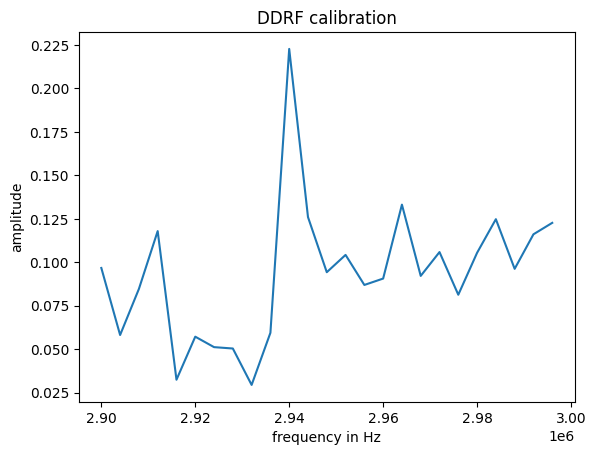

In [25]:
#DDRF transition frequency measurement
outfile = open("./14N_Calibration/DDRFamplist_freq_{:.0f}.txt".format(xq1i.DPrfspect_params['freq']), "w")
DDRFamplist = []
freqls = np.arange(2.9e6,3.00e6,4e3).tolist()
for freq in freqls:
    xq1i.DPrfspect_params['RF_freq'] = freq
    xq1i.DPrfspect_sweeps = 100000
    xq1i.do_DDrf_Spect()
    result_dict = xq1i.pulsed_measurement_logic.do_fit('Sine')
    amplitude = float(result_dict.params['amplitude'].value)
    DDRFamplist.append([freq,amplitude])
    outfile.write("{:.15f}\t{:.15f}\n".format(freq, amplitude))
    outfile.flush()
    time.sleep(2)
outfile.close()
fig = plt.figure()
ax = plt.axes()
ax.set_title('DDRF calibration')
ax.set_xlabel('frequency in Hz')
ax.set_ylabel('amplitude')
DDRFampArray = np.array(DDRFamplist)
ax.plot(DDRFampArray[:,0], DDRFampArray[:,1])
plt.show()

In [2]:
#to be removed, part of first init#
# res_freq = 1.449466e9
# xq1i.generate_params['microwave_frequency'] = res_freq
# xq1i.pulsedODMR_params['freq_start'] = res_freq - 5.0e6
# xq1i.pulsedODMR_params['freq_step'] = 0.1e6
# xq1i.pulsedODMR_sweeps = 100000 
# xq1i.do_pulsedODMR()
# time.sleep(2)
# result_dict = xq1i.pulsed_measurement_logic.do_fit('Lorentzian Dip')
# xq1i.res_freq = result_dict.params['center'].value
# time.sleep(2)

# #Measure two-qubit (QB12) gate parameters#
# xq1i.rabi_sweeps = 100000
# xq1i.do_rabi(isSlow=True)    # perform slow Rabi
# result_dict = xq1i.pulsed_measurement_logic.do_fit('Sine')
# xq1i.rabi_period_LowPower = 1/(result_dict.params['frequency'].value)  
# time.sleep(2)

xq1i.QCQB12_params['Initial_state'] = libxq1i.TQstates.State00
qcQB12 = [
    xq1i.gate("noop", param=100.0e-9),
]
xq1i.do_QuantumCircuitQB12(qcQB12)

noop(1e-07)[0]


In [6]:
from qudi.logic.pulsed.predefined_generate_methods.qubit_control_methods import Gates
from enum import Enum

def isEnumMember(enum, nameElemCandidate):
    for elem in enum:
        if elem.name == nameElemCandidate:
            return True
    return False

circ_gates = [Gates.NOOP, Gates.ucq1Sqrtz, Gates.CnNOTe]
gate_operations = ", ".join([gate.name for gate in circ_gates])
print(gate_operations)
oper_list = [Gates[oper].name for oper in gate_operations.replace(" ", "").split(",")]
print(oper_list)

for oper in oper_list:
    print(isEnumMember(Gates, oper))

NOOP, ucq1Sqrtz, CnNOTe
['NOOP', 'ucq1Sqrtz', 'CnNOTe']
True
True
True


In [7]:
import re

myCirc = [ 
    xq1i.gate("sx", 1), 
    xq1i.gate("rz", 2, param=90),
    xq1i.gate("sx", 2),
    xq1i.gate("c0x", 2),
    xq1i.gate("rz", 1, param=90),
    xq1i.gate("c1x", 2),
    xq1i.gate("c0x", 1)
]
myCircStringRepr = ", ".join([f"{gate.name}({gate.param})[{gate.qubit}]"  for gate in myCirc])
print(myCircStringRepr)

sx(0)[1], rz(90)[2], sx(0)[2], c0x(0)[2], rz(90)[1], c1x(0)[2], c0x(0)[1]


Qudi IPython kernel disconnected from local module service.


In [7]:
libxq1i.TQstates.State00.name

'State00'